<a href="https://colab.research.google.com/github/katiacardoso/Selector_Hat/blob/main/DecisionTree_again.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import random

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV
from itertools import product

In [36]:


'''# Suponha que você tenha um DataFrame chamado df com as colunas 'habilidade', 'interesse', 'personalidade' e 'casa'
df = pd.DataFrame({
    'habilidade': ['alta', 'baixa', 'media', 'alta', 'baixa'],
    'interesse': ['magia', 'esportes', 'estudos', 'magia', 'estudos'],
    'personalidade': ['extrovertido', 'introvertido', 'extrovertido', 'introvertido', 'extrovertido'],
    'casa': ['Grifinória', 'Lufa-Lufa', 'Corvinal', 'Grifinória', 'Sonserina']
})'''

# Defina as possíveis opções para cada coluna
habilidades = ['alta', 'media', 'baixa']
interesses = ['magia', 'esportes', 'estudos']
personalidades = ['extrovertido', 'introvertido']
casas = ['Grifinória', 'Lufa-Lufa', 'Corvinal', 'Sonserina']
sanguineo = ['puro', 'mestiço', 'trouxa']
especies = ['humano', 'gigante', 'fantasma', 'lobisomem']
cores_cabelo = ['preto', 'castanho', 'loiro', 'ruivo', 'cinza']
cores_olhos = ['azul', 'verde', 'castanho', 'preto']
lealdades = ['Voldemort', 'Dumbledore']


# Crie todas as combinações possíveis
combinacoes = list(product(habilidades, interesses, personalidades,sanguineo, especies, cores_cabelo, cores_olhos, lealdades))

# Crie o DataFrame
df = pd.DataFrame(combinacoes, columns=['habilidade', 'interesse', 'personalidade', 'sanguineo', 'especies', 'cores_cabelo', 'cores_olhos', 'lealdades'])

# Adicione a coluna 'casa', atribuindo as casas de maneira rotativa
df['casa'] = [casas[i % len(casas)] for i in range(len(df))]

# Embaralhe o DataFrame para que as combinações sejam distribuídas aleatoriamente entre as casas
#df = df.sample(frac=1).reset_index(drop=True)

'''
# Defina regras para evitar certas combinações
regras = [
    (df['tipo_sanguineo'] == 'x') & (df['lealdade'] == 'Voldemort') & (df['casa'] == 'Lufa-Lufa')
]

# Aplicar as regras
for regra in regras:
    df = df[~regra]
'''





df.to_csv('dt.csv', index=False)

# Criar uma cópia do DataFrame
df_copia = df.copy()

# Salvar a cópia com um nome diferente
df_copia.to_csv('gb.csv', index=False)

#print(df, '\n')

#df.head()

# Contando o número de dados de cada classe (altere para qual desejar)
contagem_de_classes = df["casa"].value_counts()

# Imprimindo o resultado
print(contagem_de_classes)

# Crie um LabelEncoder para cada coluna
le_habilidade = LabelEncoder().fit(['alta', 'media', 'baixa'])
le_interesse = LabelEncoder().fit(['magia', 'esportes', 'estudos'])
le_personalidade = LabelEncoder().fit(['extrovertido', 'introvertido'])
le_casa = LabelEncoder().fit(['Grifinória', 'Lufa-Lufa', 'Corvinal', 'Sonserina'])
le_sanguineo =  LabelEncoder().fit(['puro', 'mestiço', 'trouxa'])
le_especies =  LabelEncoder().fit(['humano', 'gigante', 'fantasma', 'lobisomem'])
le_cores_cabelo =  LabelEncoder().fit(['preto', 'castanho', 'loiro', 'ruivo', 'cinza'])
le_cores_olhos =  LabelEncoder().fit(['azul', 'verde', 'castanho', 'preto'])
le_lealdades =  LabelEncoder().fit(['Voldemort', 'Dumbledore'])

# Transforme os dados usando os LabelEncoders
df['habilidade'] = le_habilidade.transform(df['habilidade'])
df['interesse'] = le_interesse.transform(df['interesse'])
df['personalidade'] = le_personalidade.transform(df['personalidade'])
df['casa'] = le_casa.transform(df['casa'])
df['sanguineo'] = le_sanguineo.transform(df['sanguineo'])
df['especies'] = le_especies.transform(df['especies'])
df['cores_cabelo'] = le_cores_cabelo.transform(df['cores_cabelo'])
df['cores_olhos'] = le_cores_olhos.transform(df['cores_olhos'])
df['lealdades'] = le_lealdades.transform(df['lealdades'])


X = df[['habilidade', 'interesse', 'personalidade', 'sanguineo', 'especies', 'cores_cabelo', 'cores_olhos', 'lealdades']]
y = df['casa']


# Divida os dados em conjuntos de treinamento e teste
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

from sklearn.model_selection import StratifiedShuffleSplit

# Crie o objeto StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.5, random_state=42)

# Use o objeto sss para dividir os dados
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


# Crie o modelo
model_dt = DecisionTreeClassifier(max_depth= 7, min_samples_leaf= 4, random_state=42)

# Treine o modelo
model_dt.fit(X_train, y_train)

Grifinória    2160
Lufa-Lufa     2160
Corvinal      2160
Sonserina     2160
Name: casa, dtype: int64


DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, random_state=42)

ir testtando com quantidade menor e visualizar a previsao

## continuação

testar uma validação cruzada

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Suponha que X_train, X_test, y_train, y_test são seus conjuntos de treinamento e teste
# Certifique-se de ter importado os dados antes de executar o código

# Crie e treine o modelo de árvore de decisão sem regularização
model_without_regularization = DecisionTreeClassifier(random_state=42)
model_without_regularization.fit(X_train, y_train)

# Faça previsões no conjunto de teste sem regularização
y_pred_without_regularization = model_without_regularization.predict(X_test)

# Avalie a acurácia do modelo sem regularização
accuracy_without_regularization = accuracy_score(y_test, y_pred_without_regularization)
print(f'Acurácia sem regularização: {accuracy_without_regularization}')

# Crie e treine o modelo de árvore de decisão com regularização
model_with_regularization = DecisionTreeClassifier(min_samples_split=15, min_samples_leaf=12, random_state=42)
model_with_regularization.fit(X_train, y_train)

# Faça previsões no conjunto de teste com regularização
y_pred_with_regularization = model_with_regularization.predict(X_test)

# Avalie a acurácia do modelo com regularização
accuracy_with_regularization = accuracy_score(y_test, y_pred_with_regularization)
print(f'Acurácia com regularização: {accuracy_with_regularization}')


Acurácia sem regularização: 1.0
Acurácia com regularização: 1.0


In [38]:
# Faça previsões no conjunto de teste
y_pred = model_dt.predict(X_test)

# Calcule a acurácia
acuracia_dt = accuracy_score(y_test, y_pred)
print(acuracia_dt)
#ou
acuracia_dt = model_dt.score(X_test, y_test)
print(acuracia_dt)


unique_classes = np.unique(np.concatenate((y_test, y_pred)))
relatorio = classification_report(y_test, y_pred, target_names=le_casa.inverse_transform(unique_classes))
print(relatorio)

1.0
1.0
              precision    recall  f1-score   support

    Corvinal       1.00      1.00      1.00      1080
  Grifinória       1.00      1.00      1.00      1080
   Lufa-Lufa       1.00      1.00      1.00      1080
   Sonserina       1.00      1.00      1.00      1080

    accuracy                           1.00      4320
   macro avg       1.00      1.00      1.00      4320
weighted avg       1.00      1.00      1.00      4320



In [39]:


# Agora você pode usar inverse_transform para obter os rótulos originais
X_train['habilidade'] = le_habilidade.inverse_transform(X_train['habilidade'])
X_train['interesse'] = le_interesse.inverse_transform(X_train['interesse'])
X_train['personalidade'] = le_personalidade.inverse_transform(X_train['personalidade'])
X_train['sanguineo'] = le_sanguineo.inverse_transform(X_train['sanguineo'])
X_train['especies'] = le_especies.inverse_transform(X_train['especies'])
X_train['cores_cabelo'] = le_cores_cabelo.inverse_transform(X_train['cores_cabelo'])
X_train['cores_olhos'] = le_cores_olhos.inverse_transform(X_train['cores_olhos'])
X_train['lealdades'] = le_lealdades.inverse_transform(X_train['lealdades'])


X_test['habilidade'] = le_habilidade.inverse_transform(X_test['habilidade'])
X_test['interesse'] = le_interesse.inverse_transform(X_test['interesse'])
X_test['personalidade'] = le_personalidade.inverse_transform(X_test['personalidade'])
X_test['sanguineo'] = le_sanguineo.inverse_transform(X_test['sanguineo'])
X_test['especies'] = le_especies.inverse_transform(X_test['especies'])
X_test['cores_cabelo'] = le_cores_cabelo.inverse_transform(X_test['cores_cabelo'])
X_test['cores_olhos'] = le_cores_olhos.inverse_transform(X_test['cores_olhos'])
X_test['lealdades'] = le_lealdades.inverse_transform(X_test['lealdades'])



print("Classes Previstas:", y_pred)
print("Classes Verdadeiras:\n", y_test)

y_train = le_casa.inverse_transform(y_train)
y_test = le_casa.inverse_transform(y_test)

# Agora você pode visualizar os dados de treinamento e teste com os rótulos originais
print("Dados de treinamento:")
print(X_train)
print(y_train)

print("\nDados de teste:")
print(X_test)
print(y_test)

<ipython-input-39-13715a2dc9f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['habilidade'] = le_habilidade.inverse_transform(X_train['habilidade'])
<ipython-input-39-13715a2dc9f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['interesse'] = le_interesse.inverse_transform(X_train['interesse'])
<ipython-input-39-13715a2dc9f4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

Classes Previstas: [2 2 0 ... 3 1 1]
Classes Verdadeiras:
 1945    2
5301    2
4694    0
6116    1
3033    2
       ..
8289    2
2385    2
719     3
5720    1
2608    1
Name: casa, Length: 4320, dtype: int64
Dados de treinamento:
     habilidade interesse personalidade sanguineo   especies cores_cabelo  \
7933      baixa   estudos  extrovertido   mestiço   fantasma     castanho   
4708      media  esportes  introvertido    trouxa    gigante        ruivo   
4333      media  esportes  introvertido      puro     humano     castanho   
3320      media     magia  extrovertido    trouxa  lobisomem        preto   
5299      media   estudos  introvertido      puro     humano        loiro   
...         ...       ...           ...       ...        ...          ...   
5961      baixa     magia  extrovertido   mestiço    gigante        preto   
1204       alta  esportes  extrovertido   mestiço   fantasma        preto   
5402      media   estudos  introvertido      puro  lobisomem        preto   


In [28]:
from sklearn.tree import export_graphviz
import graphviz

# Exporte a árvore de decisão para o formato Graphviz
#dot_data = export_graphviz(model_dt, out_file=None)

# Converta os rótulos para strings
y_str = y.astype(str)
#X_str = X.astype(str)

# Exportar a árvore de decisão para o formato Graphviz com mais opções para melhorar a visualização
dot_data = export_graphviz(model_dt, out_file=None,
                           feature_names=X.columns,  # Usar os nomes das colunas como nomes de recursos
                           class_names=y_str.unique(),  # Usar os valores únicos da coluna y como nomes de classes
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           proportion=True,  # Mostrar proporções nas folhas
                           precision=5,  # Ajustar a precisão para números de ponto flutuante
                           rotate=True,  # Girar nós dependentes de uma condição
                           max_depth=7)  # Limitar a profundidade da árvore

# Use o Graphviz para gerar um gráfico da árvore de decisão
graph = graphviz.Source(dot_data)
graph.render("tree", format="png", cleanup=True)  # Isso vai gerar um arquivo tree.png no mesmo diretório do script

# Se você quiser visualizar a árvore diretamente no notebook, você pode usar o seguinte comando:
#graph.view()

'tree.png'

In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   habilidade     8640 non-null   int64
 1   interesse      8640 non-null   int64
 2   personalidade  8640 non-null   int64
 3   sanguineo      8640 non-null   int64
 4   especies       8640 non-null   int64
 5   cores_cabelo   8640 non-null   int64
 6   cores_olhos    8640 non-null   int64
 7   lealdades      8640 non-null   int64
 8   casa           8640 non-null   int64
dtypes: int64(9)
memory usage: 607.6 KB
None


In [30]:
import numpy as np

# Verificar classes únicas em y_test e y_pred
print("Classes únicas em y_test:", np.unique(y_test))
print("Classes únicas em y_pred:", np.unique(y_pred))


Classes únicas em y_test: ['Corvinal' 'Grifinória' 'Lufa-Lufa' 'Sonserina']
Classes únicas em y_pred: [0 1 2 3]


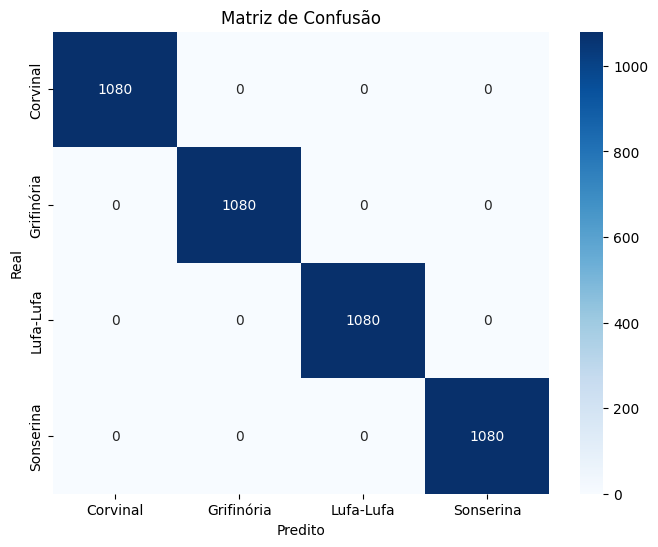

              precision    recall  f1-score   support

    Corvinal       1.00      1.00      1.00      1080
  Grifinória       1.00      1.00      1.00      1080
   Lufa-Lufa       1.00      1.00      1.00      1080
   Sonserina       1.00      1.00      1.00      1080

    accuracy                           1.00      4320
   macro avg       1.00      1.00      1.00      4320
weighted avg       1.00      1.00      1.00      4320



In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Mapeando os valores preditos de volta para os rótulos das classes
class_labels = ['Corvinal', 'Grifinória', 'Lufa-Lufa', 'Sonserina']
y_pred_labels = [class_labels[i] for i in y_pred]

# Criando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

# Imprimindo relatórios de classificação
print(metrics.classification_report(y_test, y_pred_labels, target_names=class_labels))


In [34]:
# Obtenha as probabilidades para um novo aluno
novo_aluno = np.array([
    le_habilidade.transform(['alta'])[0],
    le_interesse.transform(['esportes'])[0],
    le_personalidade.transform(['extrovertido'])[0],
    le_sanguineo.transform(['mestiço'])[0],
    le_especies.transform(['humano'])[0],
    le_cores_cabelo.transform(['loiro'])[0],
    le_cores_olhos.transform(['preto'])[0],
    le_lealdades.transform(['Dumbledore'])[0]
]).reshape(1, -1)



casa_prevista = le_casa.inverse_transform(model_dt.predict(novo_aluno))
print(casa_prevista)

casa_prevista = le_casa.inverse_transform(model_dt.predict(novo_aluno))
print(casa_prevista)


probabilidades = model_dt.predict_proba(novo_aluno)

# Imprima as probabilidades para cada casa
for casa, probabilidade in zip(le_casa.classes_, probabilidades[0]):
    print(f"A probabilidade do novo aluno pertencer à casa {casa} é {probabilidade}")

['Sonserina']
['Sonserina']
A probabilidade do novo aluno pertencer à casa Corvinal é 0.0
A probabilidade do novo aluno pertencer à casa Grifinória é 0.0
A probabilidade do novo aluno pertencer à casa Lufa-Lufa é 0.0
A probabilidade do novo aluno pertencer à casa Sonserina é 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [10]:
# Obtenha a importância das características
importances = model_dt.feature_importances_

# Crie um DataFrame para exibir as importâncias
df = pd.DataFrame({
    'Característica': ['habilidade', 'interesse', 'personalidade','sanguineo', 'especies', 'cores_cabelo', 'cores_olhos', 'lealdades'],
    'Importância': importances
})

# Ordene o DataFrame por importância
df = df.sort_values(by='Importância', ascending=False)

# Imprima o DataFrame
print(df)

  Característica  Importância
6    cores_olhos     0.666667
7      lealdades     0.333333
0     habilidade     0.000000
1      interesse     0.000000
2  personalidade     0.000000
3      sanguineo     0.000000
4       especies     0.000000
5   cores_cabelo     0.000000


# Random Forest


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

# Suponha que você já tenha seus conjuntos de treinamento e teste: X_train, X_test, y_train, y_test

X = df_copia[['habilidade', 'interesse', 'personalidade', 'sanguineo', 'especies', 'cores_cabelo', 'cores_olhos', 'lealdades']]
y = df_copia['casa']

# Converta variáveis categóricas para variáveis dummy
X = pd.get_dummies(X)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Criar e treinar o modelo de Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Exibir a importância das características
feature_importance = model_rf.feature_importances_

# Normalizar as importâncias das características
feature_importance_normalized = feature_importance / feature_importance.sum()

# Exibir as importâncias normalizadas das características
print('Importância das Características Normalizadas:')
for feature, importance in sorted(zip(X_train.columns, feature_importance_normalized), key=lambda x: x[1], reverse=True):
    print(f'{feature}: {importance}')

# Fazer previsões no conjunto de teste
y_pred_rf = model_rf.predict(X_test)

# Avaliar o desempenho do modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'------------------------------- Acurácia: {accuracy_rf} \n')

# Exibir o relatório de classificação
print('------------Relatório de Classificação:------------------- \n')
print(classification_report(y_test, y_pred_rf))


Importância das Características Normalizadas:
lealdades_Dumbledore: 0.22720780109107555
lealdades_Voldemort: 0.2151725444024564
cores_olhos_verde: 0.14990614611374595
cores_olhos_preto: 0.1469167607273637
cores_olhos_castanho: 0.12413095762878028
cores_olhos_azul: 0.11967082602158279
habilidade_alta: 0.0009608346268982943
sanguineo_trouxa: 0.0009529751575635805
sanguineo_puro: 0.0009473148021152108
interesse_magia: 0.000935391118016333
sanguineo_mestiço: 0.0008928868709798897
personalidade_extrovertido: 0.0008708719654562813
interesse_esportes: 0.0008623785195961868
habilidade_baixa: 0.0008609815787312082
personalidade_introvertido: 0.0008589590484037224
especies_gigante: 0.0008494076540789062
especies_fantasma: 0.0008453041345954387
especies_humano: 0.0008445392638231143
cores_cabelo_preto: 0.0008327933920980938
habilidade_media: 0.000823413145718995
cores_cabelo_castanho: 0.0008181765478716632
cores_cabelo_cinza: 0.0008077604182186012
interesse_estudos: 0.0007938928913403995
especies

In [12]:
# Exibir a importância das características
feature_importance = model_rf.feature_importances_

# Mapear as importâncias das características para os nomes das características
feature_importance_dict = dict(zip(X_train.columns, feature_importance))

# Exibir as importâncias das características
print('Importância das Características:')
for feature, importance in sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True):
    print(f'{feature}: {importance}')


Importância das Características:
lealdades_Dumbledore: 0.22720780109107555
lealdades_Voldemort: 0.2151725444024564
cores_olhos_verde: 0.14990614611374595
cores_olhos_preto: 0.1469167607273637
cores_olhos_castanho: 0.12413095762878028
cores_olhos_azul: 0.11967082602158279
habilidade_alta: 0.0009608346268982943
sanguineo_trouxa: 0.0009529751575635805
sanguineo_puro: 0.0009473148021152108
interesse_magia: 0.000935391118016333
sanguineo_mestiço: 0.0008928868709798897
personalidade_extrovertido: 0.0008708719654562813
interesse_esportes: 0.0008623785195961868
habilidade_baixa: 0.0008609815787312082
personalidade_introvertido: 0.0008589590484037224
especies_gigante: 0.0008494076540789062
especies_fantasma: 0.0008453041345954387
especies_humano: 0.0008445392638231143
cores_cabelo_preto: 0.0008327933920980938
habilidade_media: 0.000823413145718995
cores_cabelo_castanho: 0.0008181765478716632
cores_cabelo_cinza: 0.0008077604182186012
interesse_estudos: 0.0007938928913403995
especies_lobisomem: 0

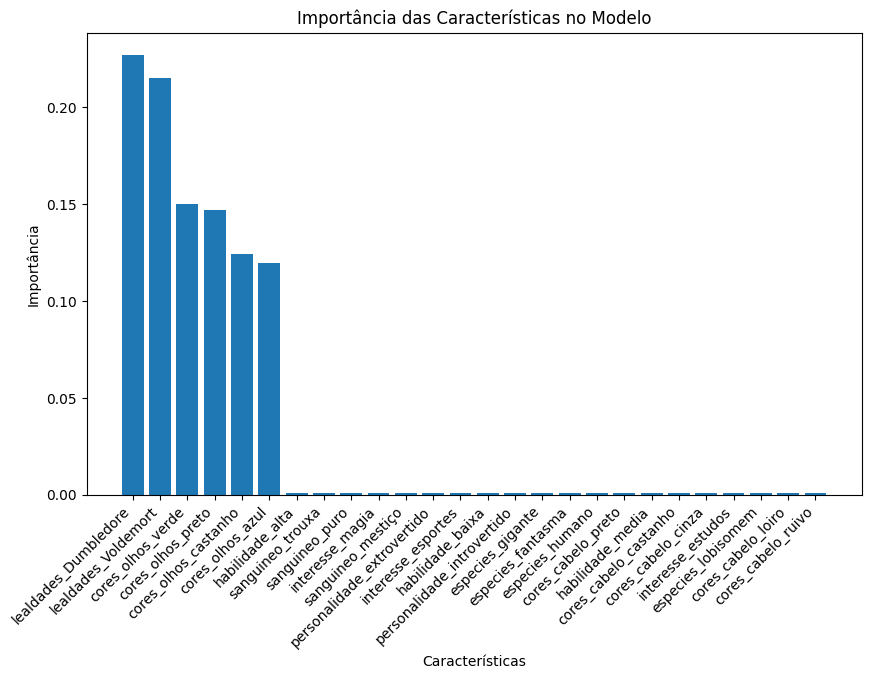

In [13]:
import matplotlib.pyplot as plt


# Criar uma representação visual da importância das características
plt.figure(figsize=(10, 6))
features, importance = zip(*sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))
plt.bar(features, importance)
plt.xlabel('Características')
plt.ylabel('Importância')
plt.title('Importância das Características no Modelo')
plt.xticks(rotation=45, ha='right')
plt.show()